# Financial Analysis of Higher Education Institutions

### In this notebook, I explored a dataset containing financial information from American higher education institutions. Our goal is to explore the potential for machine learning methods to classify institutions by their Carnegie classification. In doing so, we contribute to the possibility of empirical methods of classification becoming more prominent amongst established social classification systems.

### By the end of this notebook, I had explored & selected features for model training, transformed data into a useful format, merged and validated class labels, and produced meaningful visualizations to reinforce my decisions.

### To anyone reading ths notebook, thank you for your time. I hope these comments assist in understanding my thought process as an analyst.

## Imports & first look at data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/research_data/finances_df_15_17.csv', index_col = 0)

In [ ]:
df.head()

,unitid,year,endow_per_fte,fips,ftpt,level_of_study,type_of_aid,number_of_students,percent_of_students,average_grant,total_grant,exp_instruc_total,exp_research_total,infrastructure
1,100654,2016,10416.07179,Alabama,Total,Undergraduate,Federal student loan,3734,0.77,7000.0,26139680,36797670.0,10150441.0,NaN
2,100654,2016,10416.07179,Alabama,Total,Undergraduate,Pell grant,3444,0.71,4632.0,15953983,36797670.0,10150441.0,NaN
3,100654,2016,10416.07179,Alabama,Total,Undergraduate,Federal state local or institutional grants,4225,0.87,9846.0,41598091,36797670.0,10150441.0,NaN
4,100654,2017,NaN,Alabama,Total,Undergraduate,Pell grant,3561,0.71,5005.0,17821852,30423688.0,12219233.0,NaN
5,100654,2017,NaN,Alabama,Total,Undergraduate,Federal student loan,3781,0.75,7027.0,26570635,30423688.0,12219233.0,NaN


## Drop columns with one unique value

In [ ]:
df = df.drop(['level_of_study', 'infrastructure', 'ftpt'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6522 entries, 1 to 6522
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unitid               6522 non-null   int64  
 1   year                 6522 non-null   int64  
 2   endow_per_fte        6174 non-null   float64
 3   fips                 6522 non-null   object 
 4   type_of_aid          6522 non-null   object 
 5   number_of_students   6522 non-null   int64  
 6   percent_of_students  6522 non-null   float64
 7   average_grant        6506 non-null   float64
 8   total_grant          6522 non-null   int64  
 9   exp_instruc_total    6522 non-null   float64
 10  exp_research_total   4473 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 611.4+ KB


## Create labels dataframe as response variable of interest

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/research_data/cc_df_15_18.csv', index_col=0)
labels = labels[labels['year'] != 2018]

In [ ]:
merged_df = pd.merge(df, labels, on = ['unitid', 'year'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6522 entries, 0 to 6521
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unitid               6522 non-null   int64  
 1   year                 6522 non-null   int64  
 2   endow_per_fte        6174 non-null   float64
 3   fips                 6522 non-null   object 
 4   type_of_aid          6522 non-null   object 
 5   number_of_students   6522 non-null   int64  
 6   percent_of_students  6522 non-null   float64
 7   average_grant        6506 non-null   float64
 8   total_grant          6522 non-null   int64  
 9   exp_instruc_total    6522 non-null   float64
 10  exp_research_total   4473 non-null   float64
 11  cc_undergrad         6522 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 611.6+ KB


## Calculate aggregate means within Carnegie classes for filling NA values

In [ ]:
fill_values = merged_df[['cc_undergrad','total_grant', 'exp_research_total', 'endow_per_fte', 'average_grant']].groupby('cc_undergrad').mean().reset_index()
fill_values['exp_research_total'] = fill_values['exp_research_total'].fillna(fill_values['exp_research_total'].mean())

In [ ]:
for col_name in ['endow_per_fte', 'average_grant', 'exp_research_total']:
  merged_df[col_name] = merged_df.apply(lambda row: row[col_name] if pd.notna(row[col_name]) else max(fill_values[fill_values['cc_undergrad'] == row['cc_undergrad']][col_name].values[0], 0), axis = 1)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6522 entries, 0 to 6521
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unitid               6522 non-null   int64  
 1   year                 6522 non-null   int64  
 2   endow_per_fte        6522 non-null   float64
 3   fips                 6522 non-null   object 
 4   type_of_aid          6522 non-null   object 
 5   number_of_students   6522 non-null   int64  
 6   percent_of_students  6522 non-null   float64
 7   average_grant        6522 non-null   float64
 8   total_grant          6522 non-null   int64  
 9   exp_instruc_total    6522 non-null   float64
 10  exp_research_total   6522 non-null   float64
 11  cc_undergrad         6522 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 611.6+ KB


## Encode response variable for visualizations and simplicity

In [ ]:
encoder = LabelEncoder()
merged_df['cc_undergrad_encoded'] = pd.Series(encoder.fit_transform(merged_df['cc_undergrad']))

## Saving csv for future work

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/research_data/merged_df.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/research_data/merged_df.csv', index_col = 0)

## Exploring classes and features

In [ ]:
df['cc_undergrad_encoded'].value_counts()

,count
cc_undergrad_encoded,
3,2202
4,1182
2,735
5,633
0,519
7,426
8,201
6,195
1,159


## Save label key as dataframe

In [ ]:
labels = df[['cc_undergrad_encoded', 'cc_undergrad']].drop_duplicates().sort_values('cc_undergrad_encoded').reset_index(drop=True)
print(labels)

    cc_undergrad_encoded                                       cc_undergrad
0                      0   Four-year full-time inclusive higher transfer-in
1                      1    Four-year full-time inclusive lower transfer-in
2                      2  Four-year full-time more selective higher tran...
3                      3  Four-year full-time more selective lower trans...
4                      4   Four-year full-time selective higher transfer-in
5                      5    Four-year full-time selective lower transfer-in
6                      6                         Four-year higher part-time
7                      7  Four-year medium full-time  selective higher t...
8                      8  Four-year medium full-time inclusive higher tr...
9                      9  Four-year medium full-time inclusive lower tra...
10                    10  Four-year medium full-time selective lower tra...
11                    11              Not classified (Exclusively Graduate)
12          

In [ ]:
labels.to_csv('/content/drive/MyDrive/research_data/cc_labels.csv')

## Data wrangling for useful features and transformations

In [ ]:
total_allocation_df = df[['unitid', 'year', 'endow_per_fte', 'exp_instruc_total', 'exp_research_total', 'cc_undergrad', 'cc_undergrad_encoded']].drop_duplicates()

In [ ]:
total_allocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 0 to 6519
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unitid                2174 non-null   int64  
 1   year                  2174 non-null   int64  
 2   endow_per_fte         2174 non-null   float64
 3   exp_instruc_total     2174 non-null   float64
 4   exp_research_total    2174 non-null   float64
 5   cc_undergrad          2174 non-null   object 
 6   cc_undergrad_encoded  2174 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 135.9+ KB


In [ ]:
total_allocation_df['research_ratio'] = total_allocation_df['exp_research_total'] / total_allocation_df['exp_instruc_total']

In [ ]:
total_allocation_df['log_rr'] = total_allocation_df['research_ratio'].apply(np.log)

In [ ]:
total_allocation_df['log_endow'] = total_allocation_df['endow_per_fte'].apply(np.log)

In [ ]:
total_allocation_df.head()

,unitid,year,endow_per_fte,exp_instruc_total,exp_research_total,cc_undergrad,cc_undergrad_encoded,research_ratio,log_endow
0,100654,2016,10416.071790,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1,0.275845,9.251105
3,100654,2017,76313.820489,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1,0.401635,11.242609
6,100858,2015,26531.066650,251325250.0,121678440.0,Four-year full-time more selective higher tran...,2,0.484147,10.186072
9,100858,2016,29092.461050,325435650.0,162394740.0,Four-year full-time more selective higher tran...,2,0.499007,10.278234
12,100858,2017,28994.820780,317188300.0,192211550.0,Four-year full-time more selective higher tran...,2,0.605986,10.274872


## Exploring endowments by class  
### This is a useful measure of each institution's individual wealth, so I thought there could be a distinction between the classes.
### After noting a strong right-skew, I started thinking about a possible transformation.

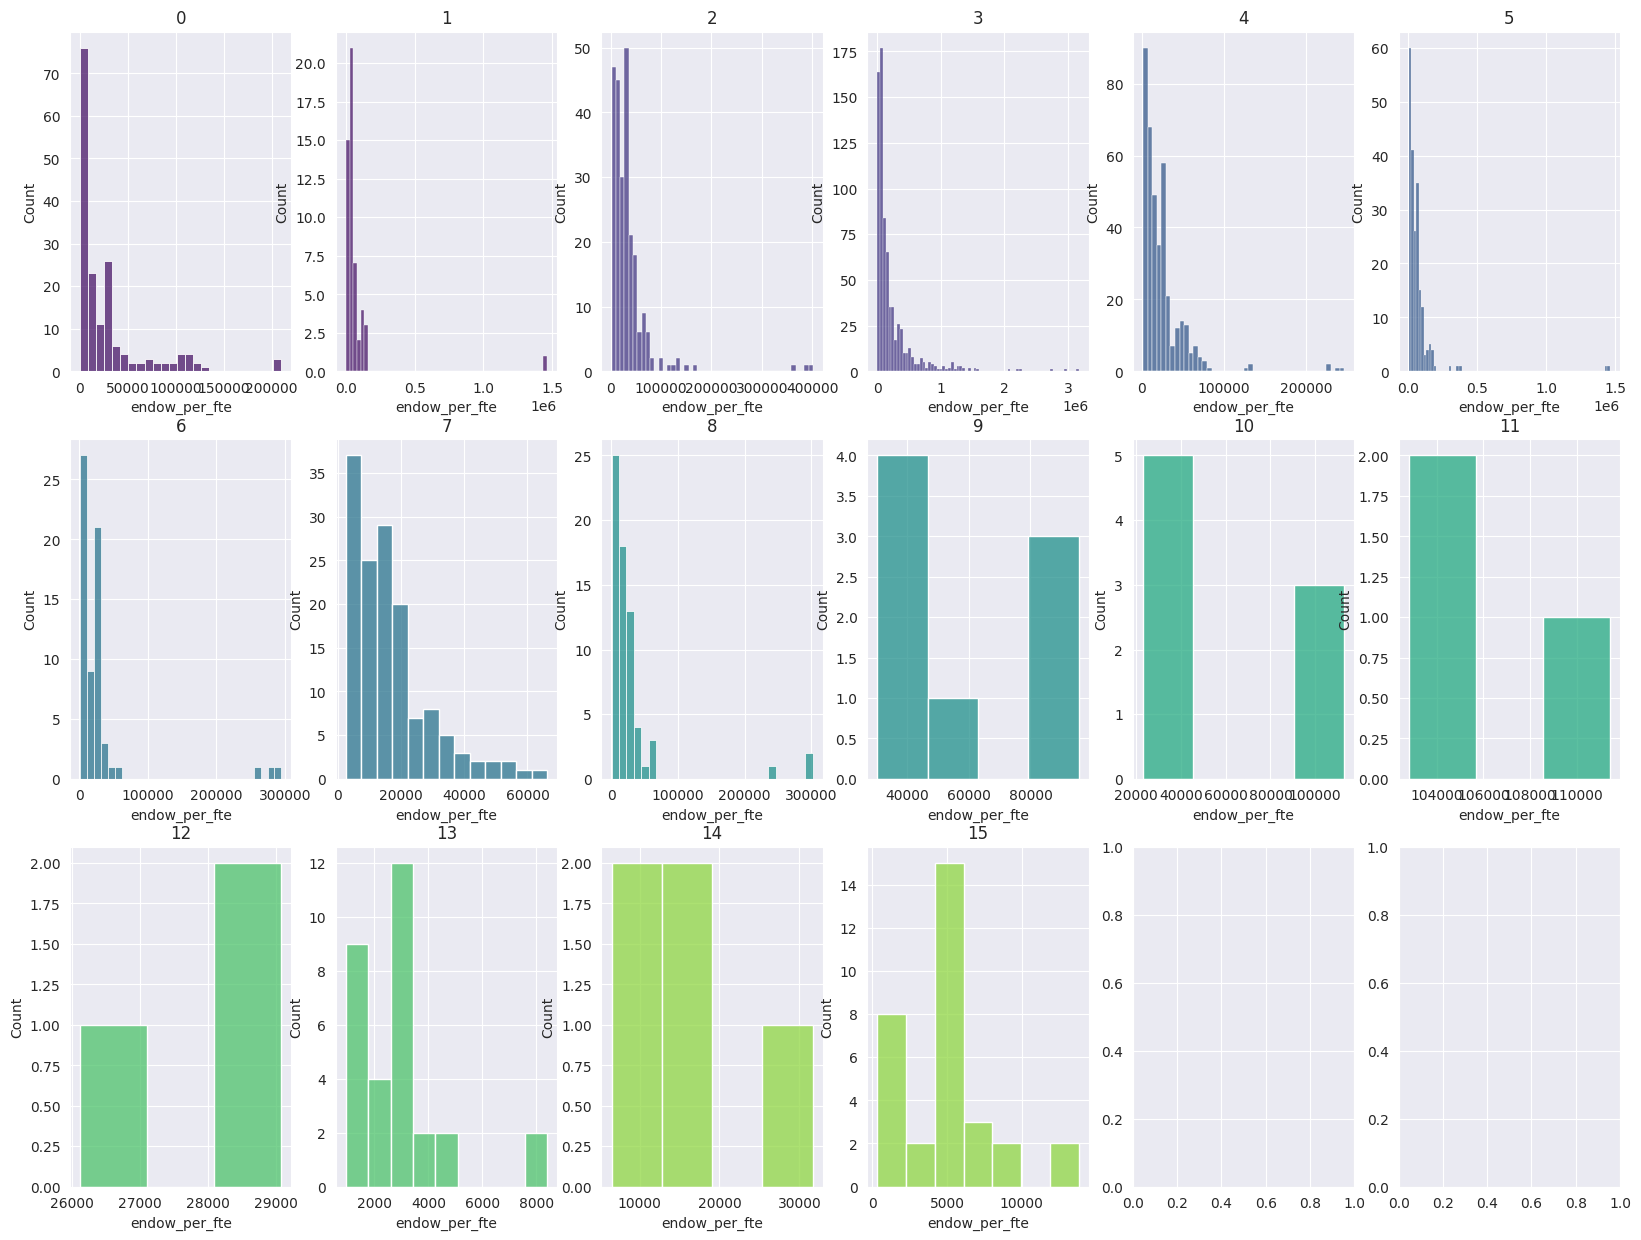

In [ ]:
fig, axes = plt.subplots(3,6, figsize = (20, 15))
palette = sns.color_palette('viridis', 17)
for classname, i in zip(sorted(total_allocation_df['cc_undergrad_encoded'].unique()), range(17)):
  sns.histplot(data = total_allocation_df[total_allocation_df['cc_undergrad_encoded'] == classname], x = 'endow_per_fte', color = palette[i + (i % 2)*(-1)], legend = False, ax = axes[i // 6, i % 6])
  axes[i // 6, i % 6].set_title(classname)

## Another view of the distribution

Text(0.5, 0, 'Endowment per full time equivalent')

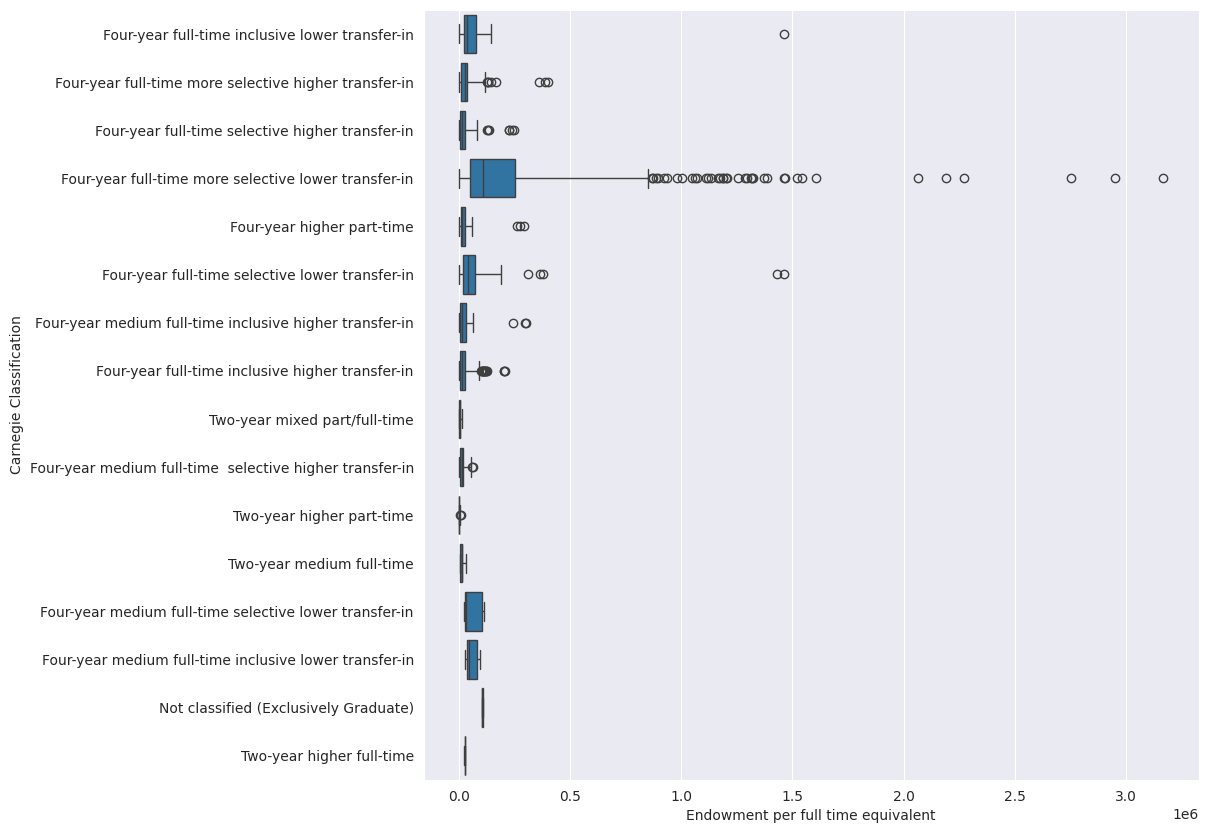

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = total_allocation_df, x = 'endow_per_fte', y = 'cc_undergrad', whis = 3, ax = ax)
ax.set_ylabel('Carnegie Classification')
ax.set_xlabel('Endowment per full time equivalent')

## Log transformation

### This transformatin is one way to normalize the skewed variables before loading them into our model, so it will be useful for similar variables as well.

Text(0.5, 1.0, 'Log(Endowment per Full-Time Equivalent)')

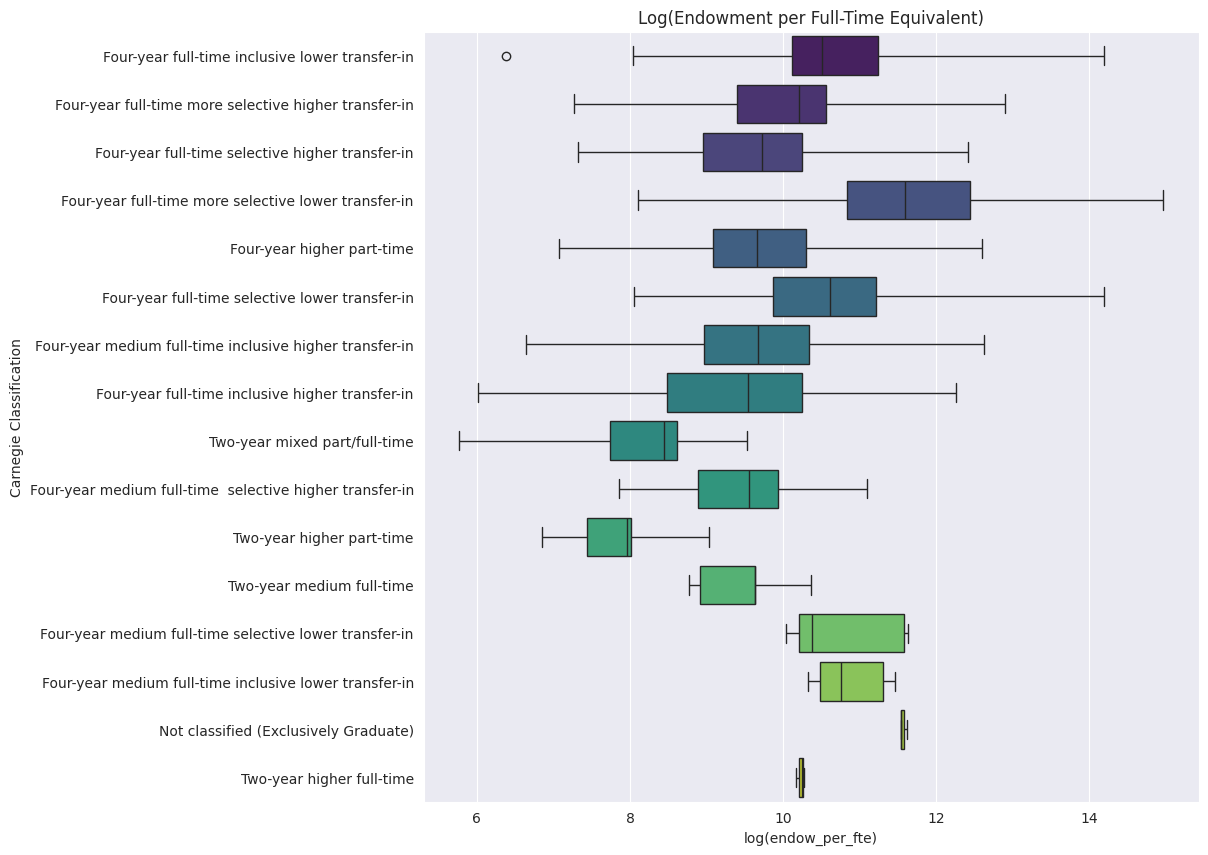

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = total_allocation_df, x = 'log_endow', y = 'cc_undergrad', whis = 3, hue = 'cc_undergrad', palette = 'viridis', ax = ax)
ax.set_ylabel('Carnegie Classification')
ax.set_xlabel('log(endow_per_fte)')
ax.set_title('Log(Endowment per Full-Time Equivalent)')

## Average research expense ratios by class

In [ ]:
rr_avg = total_allocation_df[['cc_undergrad_encoded', 'research_ratio']].groupby('cc_undergrad_encoded').mean()

Text(0.5, 0, 'Carnegie Classification')

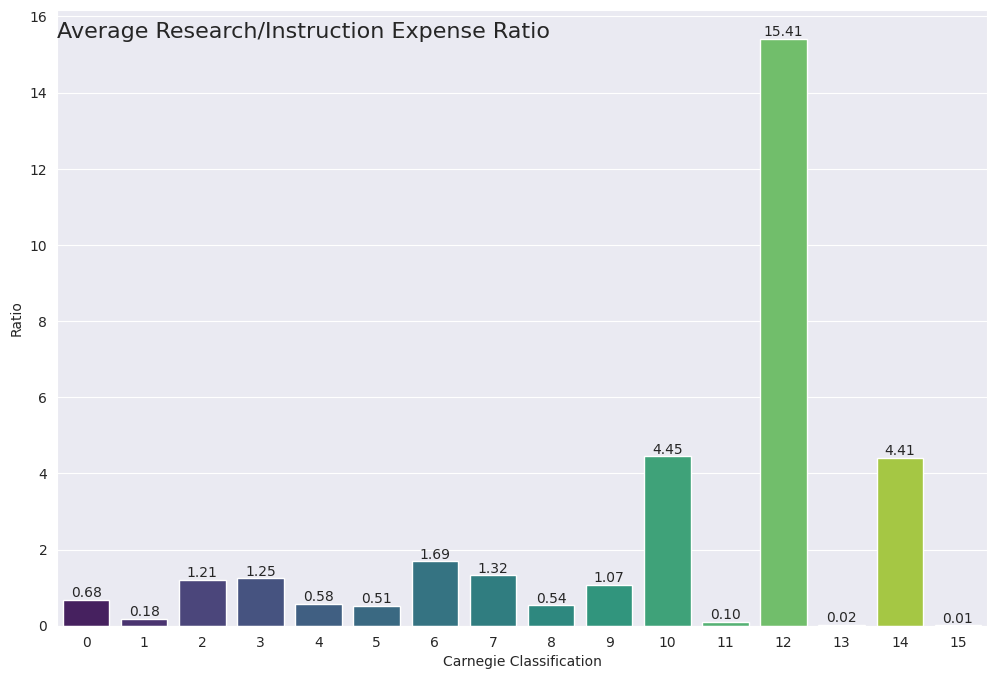

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(data = rr_avg['research_ratio'], palette='viridis', ax = ax)

for i in ax.containers:
  ax.bar_label(i, fmt = '%.2f')

ax.set_title('Average Research/Instruction Expense Ratio', pad = -20, loc = 'left', fontsize = 16)
ax.set_ylabel('Ratio')
ax.set_xlabel('Carnegie Classification')

## Log transformation on expense ratio variable

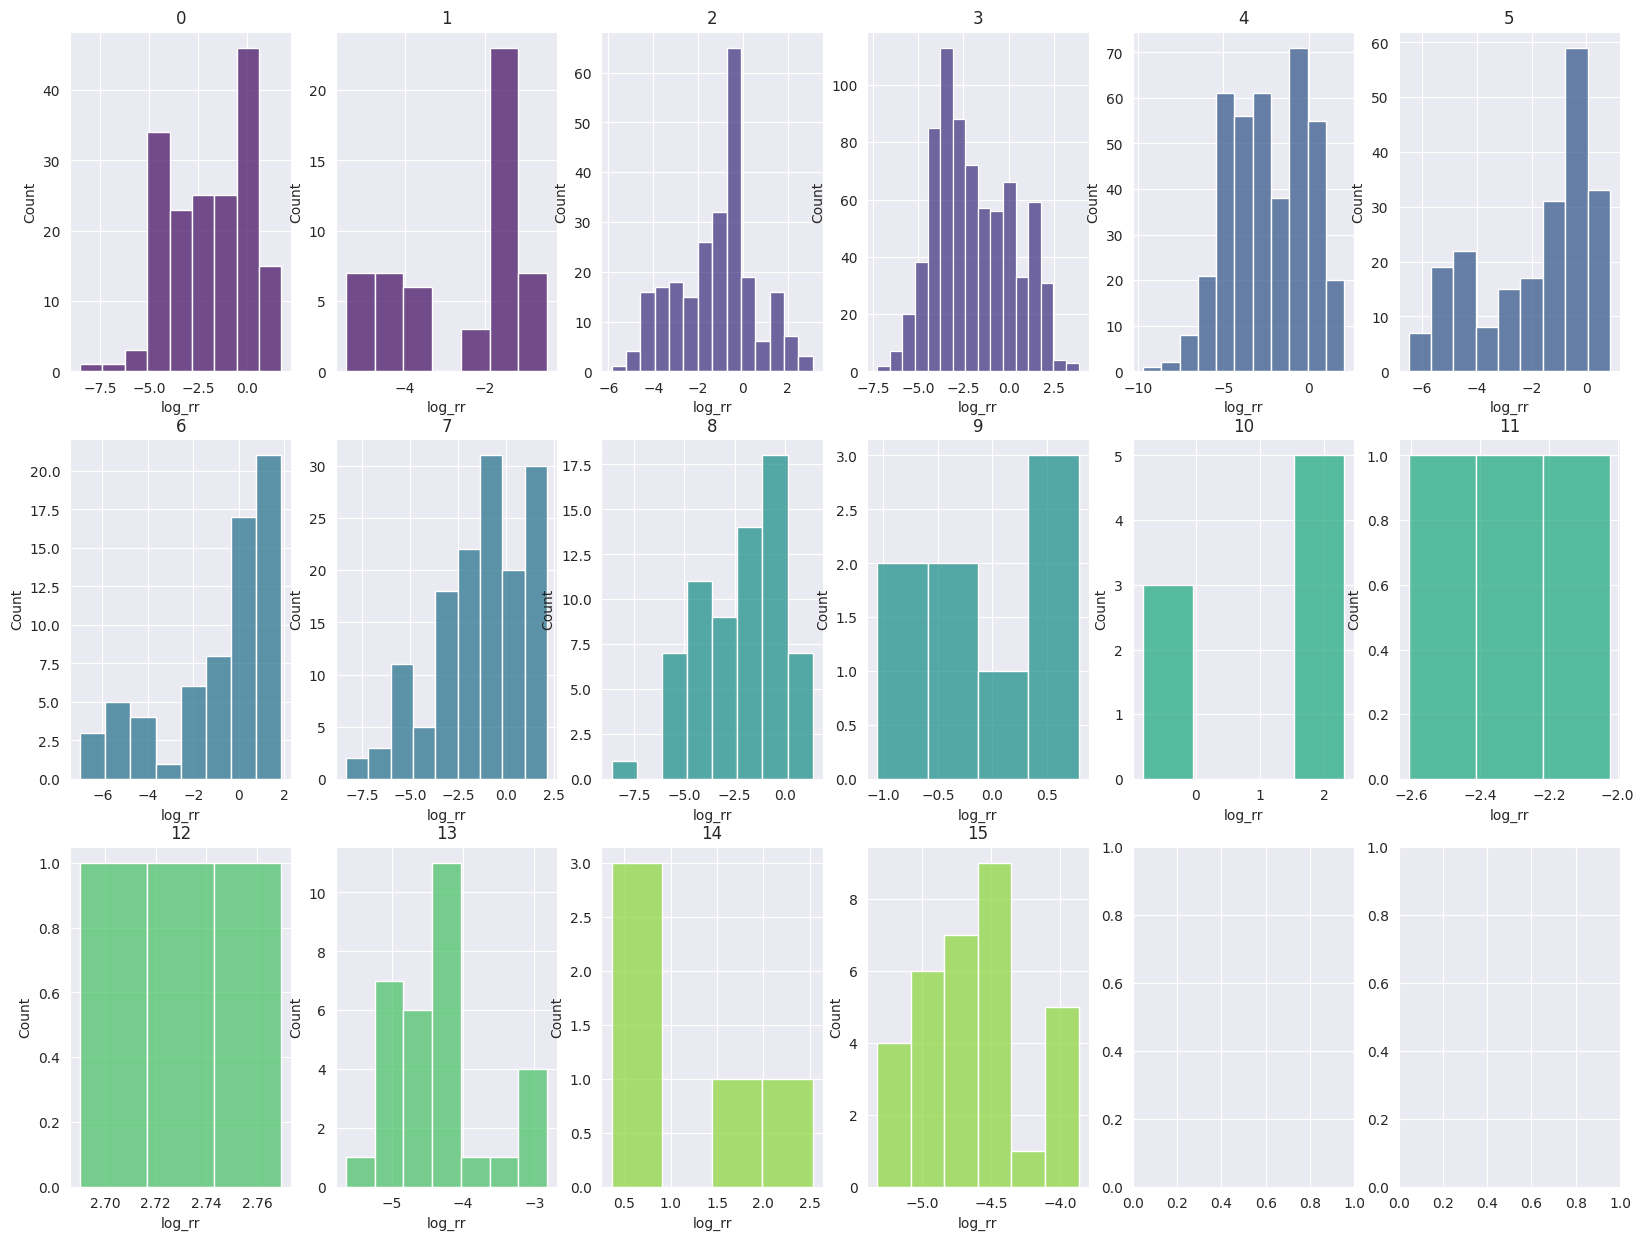

In [ ]:
fig, axes = plt.subplots(3,6, figsize = (20, 15))
palette = sns.color_palette('viridis', 17)
for classname, i in zip(sorted(total_allocation_df['cc_undergrad_encoded'].unique()), range(17)):
  sns.histplot(data = total_allocation_df[total_allocation_df['cc_undergrad_encoded'] == classname], x = 'log_rr', color = palette[i + (i % 2)*(-1)], legend = False, ax = axes[i // 6, i % 6])
  axes[i // 6, i % 6].set_title(classname)

<Axes: xlabel='log_rr', ylabel='cc_undergrad'>

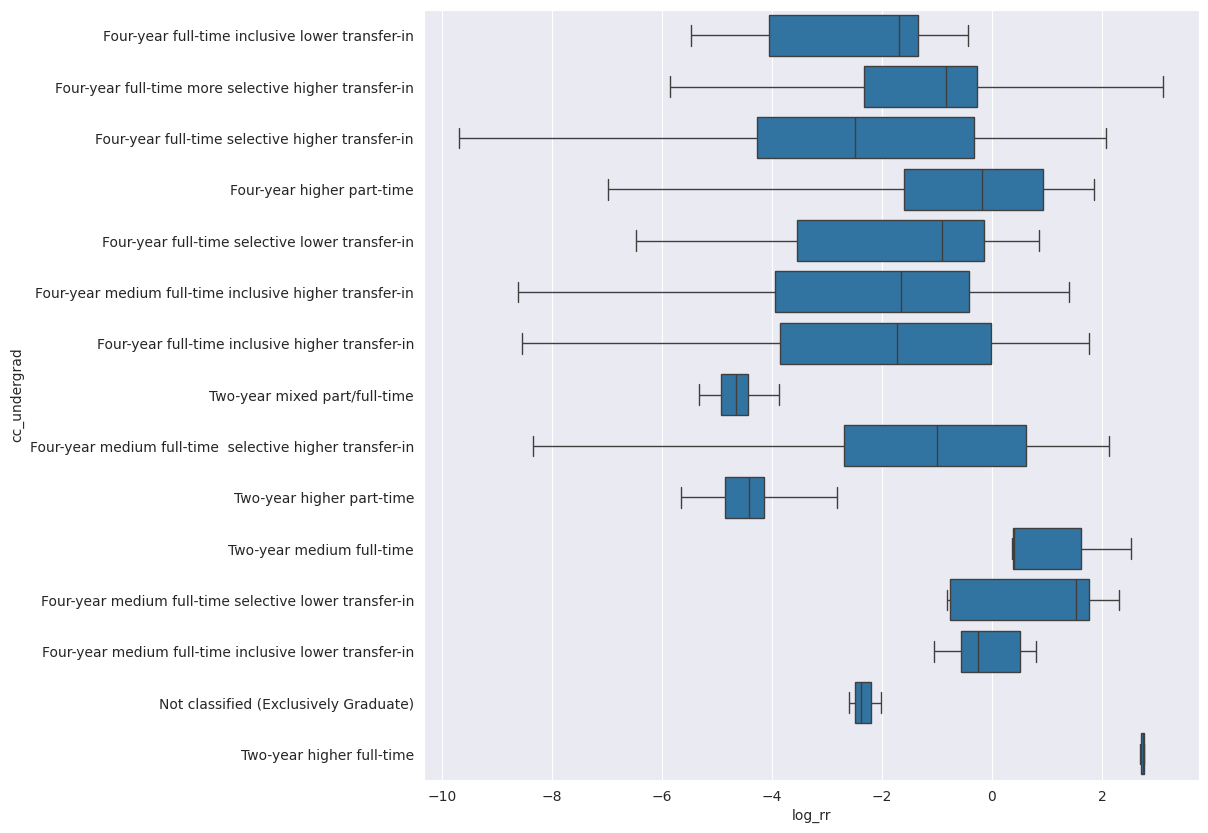

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = total_allocation_df[total_allocation_df['cc_undergrad'] != 'Four-year full-time more selective lower transfer-in'], x = 'log_rr', y = 'cc_undergrad', whis = 3, ax = ax)

## Validating year for equal class size

### Data for class labels contained data for 2018 as well, but the financial data did not. Referring to this distribution of classes, 2018 can be used as a validation set for model trained on previous years.

<Axes: xlabel='cc_undergrad_encoded', ylabel='count'>

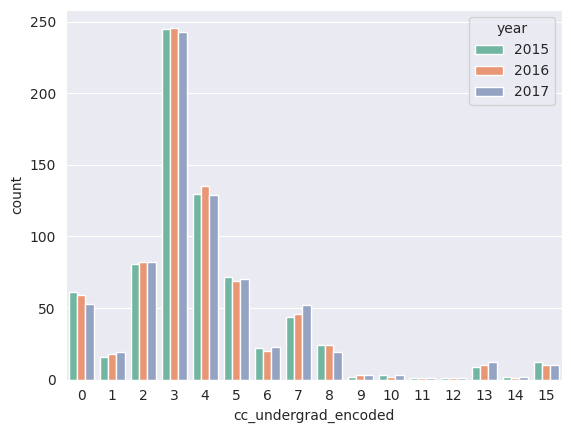

In [ ]:
sns.countplot(data = total_allocation_df, x = 'cc_undergrad_encoded', palette = 'Set2', hue = 'year')

In [ ]:
grants_df = df.drop(['exp_research_total', 'exp_instruc_total', 'cc_undergrad'], axis = 1)

In [ ]:
grant_sums = grants_df.groupby(['unitid', 'year']).sum()['total_grant']

In [ ]:
grants_df['proportion'] = grants_df.apply(lambda row: row['total_grant'] / (grant_sums.loc[(row['unitid'], row['year'])]), axis = 1)

In [ ]:
grants_df.head(6)

,unitid,year,endow_per_fte,fips,type_of_aid,number_of_students,percent_of_students,average_grant,total_grant,cc_undergrad_encoded,proportion
0,100654,2016,10416.071790,Alabama,Federal student loan,3734,0.77,7000.0,26139680,1,0.312333
1,100654,2016,10416.071790,Alabama,Pell grant,3444,0.71,4632.0,15953983,1,0.190628
2,100654,2016,10416.071790,Alabama,Federal state local or institutional grants,4225,0.87,9846.0,41598091,1,0.497039
3,100654,2017,76313.820489,Alabama,Pell grant,3561,0.71,5005.0,17821852,1,0.204617
4,100654,2017,76313.820489,Alabama,Federal student loan,3781,0.75,7027.0,26570635,1,0.305063
5,100654,2017,76313.820489,Alabama,Federal state local or institutional grants,4401,0.87,9704.0,42706297,1,0.490320


## Creating new grouped dataframe for data on grants

In [ ]:
grant_proportions = grants_df[['cc_undergrad_encoded', 'type_of_aid','total_grant']].groupby(['cc_undergrad_encoded', 'type_of_aid']).mean()

In [ ]:
grant_proportions.unstack()

total_grant  \
type_of_aid          Federal state local or institutional grants   
cc_undergrad_encoded                                               
0                                                   4.540677e+07   
1                                                   3.084512e+07   
2                                                   1.199559e+08   
3                                                   7.867689e+07   
4                                                   5.623949e+07   
5                                                   4.099080e+07   
6                                                   4.290095e+07   
7                                                   5.927969e+07   
8                                                   3.055950e+07   
9                                                   1.687069e+07   
10                                                  7.633639e+07   
11                                                  5.619705e+06   
12                                                  1.120347e+07   
13                                                  1.844904e+07   
14                                                  1.573988e+07   
15                                                  2.296153e+07   

                                                         
type_of_aid          Federal student loan    Pell grant  
cc_undergrad_encoded                                     
0                            2.124594e+07  1.464961e+07  
1                            1.217091e+07  4.954015e+06  
2                            4.421908e+07  1.903624e+07  
3                            1.450006e+07  4.238950e+06  
4                            3.064571e+07  1.326453e+07  
5                            1.563857e+07  4.572663e+06  
6                            2.894753e+07  2.239950e+07  
7                            4.115682e+07  1.932754e+07  
8                            1.844825e+07  9.896969e+06  
9                            5.838619e+06  2.941382e+06  
10                           1.327183e+07  2.970301e+06  
11                           2.470167e+06  6.307227e+05  
12                           2.896844e+06  1.983033e+06  
13                           1.157851e+07  1.390048e+07  
14                           9.157714e+06  7.934835e+06  
15                           1.463904e+07  1.350114e+07

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0.2, vmax=0.8)  # Adjust vmin and vmax for duller colors
cmap = cm.get_cmap('viridis')
cmap([20, 25, 40])

<ipython-input-32-6902aa6d4543>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


array([[0.283197, 0.11568 , 0.436115, 1.      ],
       [0.282623, 0.140926, 0.457517, 1.      ],
       [0.270595, 0.214069, 0.507052, 1.      ]])

## Imrpoved visualizations from before

<ipython-input-66-939327599a88>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = rr_avg['research_ratio'], palette='viridis', ax = ax2)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

Text(0.5, 0, 'Carnegie Classification')

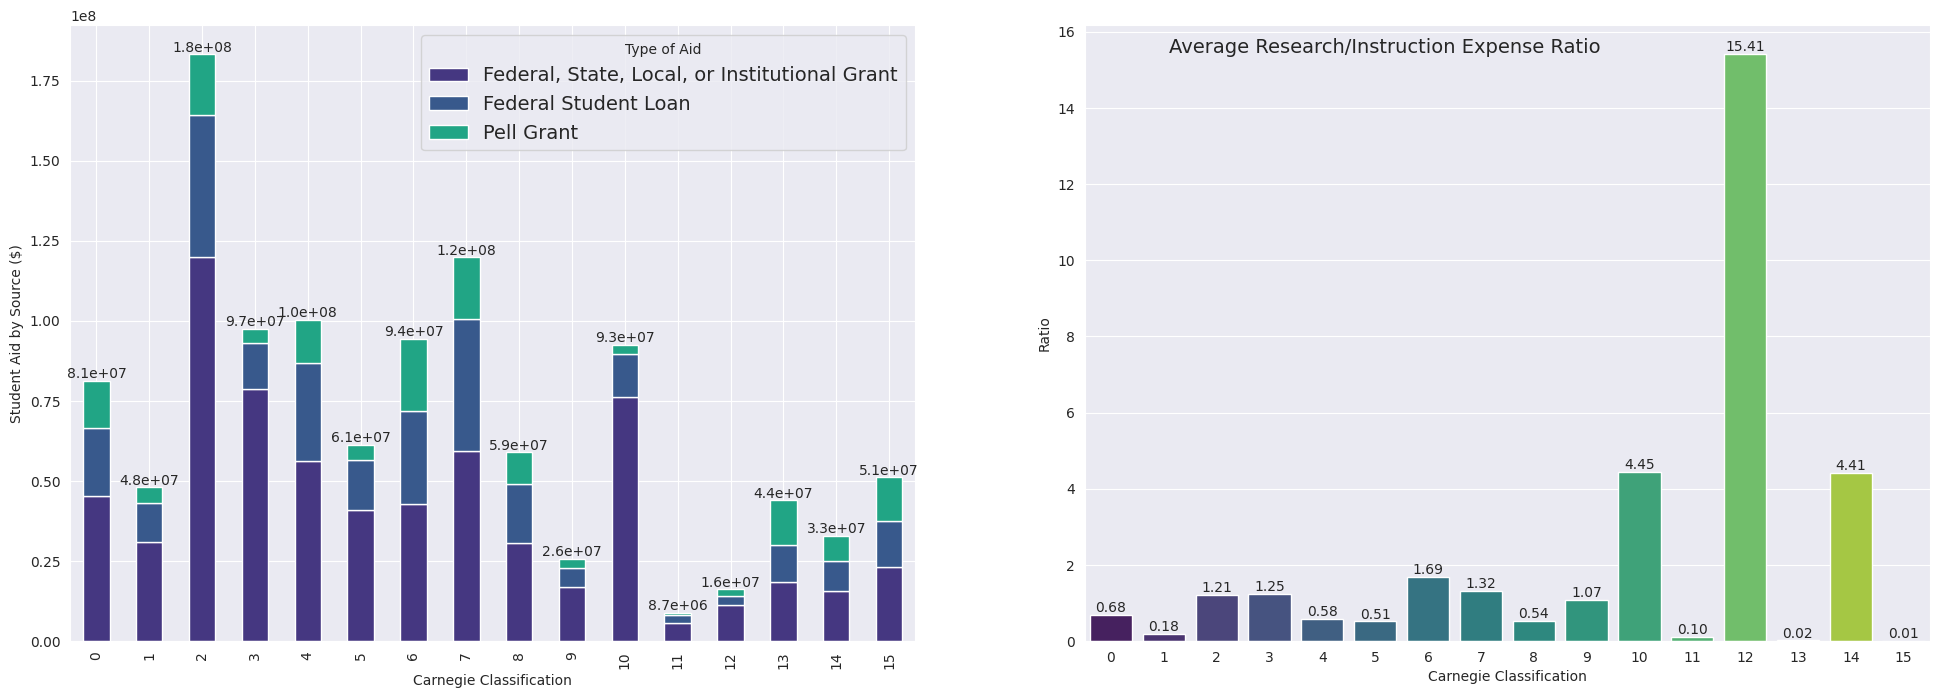

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 8))

grant_proportions.unstack().plot(kind = 'bar', stacked = True, color = cmap([40, 70, 150]), ax = ax1)

for i, c in zip(ax1.containers, range(len(ax1.containers))):
    if (c+1)%3 == 0:
      ax1.bar_label(i, fmt = '%.1e')

ax1.set_xlabel('Carnegie Classification')
ax1.set_ylabel('Student Aid by Source ($)')
ax1.legend(title = 'Type of Aid', labels = ['Federal, State, Local, or Institutional Grant', 'Federal Student Loan', 'Pell Grant'], fontsize = 14)

sns.barplot(data = rr_avg['research_ratio'], palette='viridis', ax = ax2)

for i in ax2.containers:
  ax2.bar_label(i, fmt = '%.2f')

ax2.set_title('Average Research/Instruction Expense Ratio', pad = -20, loc = 'left', x = 0.1, fontsize = 14)
ax2.set_ylabel('Ratio')
ax2.set_xlabel('Carnegie Classification')

In [ ]:
aid_totals = grants_df[['unitid', 'year', 'total_grant', 'cc_undergrad_encoded']].groupby(['cc_undergrad_encoded', 'year', 'unitid']).sum()

In [ ]:
mean_grant_student_proportions = df[['type_of_aid', 'percent_of_students', 'cc_undergrad_encoded']].groupby(['cc_undergrad_encoded', 'type_of_aid']).mean()

## Stacked visual for grant proportions

### I did not believe the proprtions of each grant were significant in classifying institutions. However, the total ammount of aid was. For this reason, I kept the aid ammounts in our data.

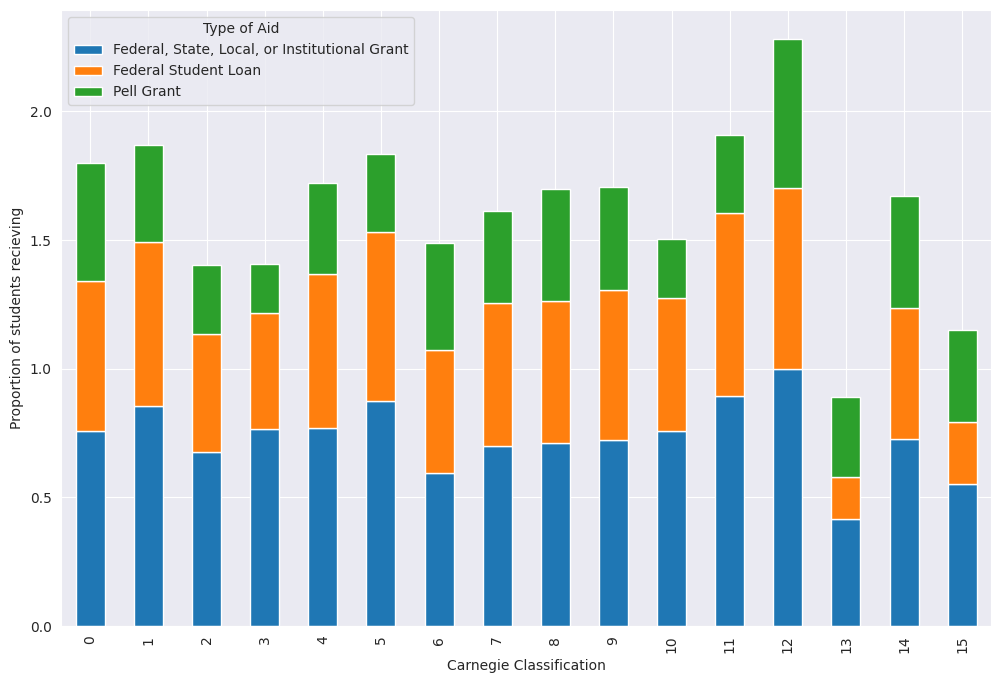

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
mean_grant_student_proportions.unstack().plot(kind = 'bar', stacked = True, ax = ax)
ax.set_xlabel('Carnegie Classification')
ax.set_ylabel('Proportion of students recieving')
plt.legend(title = 'Type of Aid', labels = ['Federal, State, Local, or Institutional Grant', 'Federal Student Loan', 'Pell Grant'])

In [ ]:
df.head()

,unitid,year,endow_per_fte,fips,type_of_aid,number_of_students,percent_of_students,average_grant,total_grant,exp_instruc_total,exp_research_total,cc_undergrad,cc_undergrad_encoded
0,100654,2016,10416.071790,Alabama,Federal student loan,3734,0.77,7000.0,26139680,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
1,100654,2016,10416.071790,Alabama,Pell grant,3444,0.71,4632.0,15953983,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
2,100654,2016,10416.071790,Alabama,Federal state local or institutional grants,4225,0.87,9846.0,41598091,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
3,100654,2017,76313.820489,Alabama,Pell grant,3561,0.71,5005.0,17821852,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1
4,100654,2017,76313.820489,Alabama,Federal student loan,3781,0.75,7027.0,26570635,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1


## Merging data into a useful format

In [ ]:
aid_subset = df[['type_of_aid', 'number_of_students', 'percent_of_students', 'average_grant', 'total_grant']]

In [ ]:
aid_subset = aid_subset.set_index('type_of_aid').stack().reset_index()

In [ ]:
aid_subset.head()

,type_of_aid,level_1,0
0,Federal student loan,number_of_students,3734.00
1,Federal student loan,percent_of_students,0.77
2,Federal student loan,average_grant,7000.00
3,Federal student loan,total_grant,26139680.00
4,Pell grant,number_of_students,3444.00


In [ ]:
aid_subset['grant_type_info'] = aid_subset['type_of_aid'] + ',' + aid_subset['level_1']

In [ ]:
aid_subset.drop(['type_of_aid', 'level_1'], axis = 1, inplace = True)

In [ ]:
aid_subset = pd.DataFrame(aid_subset.set_index('grant_type_info').values.reshape(2174, 12), columns = ['Federal Loan Count', 'Federal Loan Proportion', 'Federal Loan Average', 'Federal Loan Total', \
                                                                                                       'Pell Grant Count', 'Pell Grant Proportion', 'Pell Grant Average', 'Pell Grant Total', \
                                                                                                       'Federal, State, Local, Institutional Grant Count', 'Federal, State, Local, Institutional Grant Proportion', \
                                                                                                       'Federal, State, Local, Institutional Grant Average', 'Federal, State, Local, Institutional Grant Total'])

In [ ]:
aid_subset.head()

,Federal Loan Count,Federal Loan Proportion,Federal Loan Average,Federal Loan Total,Pell Grant Count,Pell Grant Proportion,Pell Grant Average,Pell Grant Total,"Federal, State, Local, Institutional Grant Count","Federal, State, Local, Institutional Grant Proportion","Federal, State, Local, Institutional Grant Average","Federal, State, Local, Institutional Grant Total"
0,3734.0,0.77,7000.0,26139680.0,3444.0,0.71,4632.0,15953983.0,4225.0,0.87,9846.0,41598091.0
1,3561.0,0.71,5005.0,17821852.0,3781.0,0.75,7027.0,26570635.0,4401.0,0.87,9704.0,42706297.0
2,11435.0,0.52,8422.0,96307943.0,7144.0,0.33,6709.0,47927393.0,3338.0,0.15,4209.0,14050159.0
3,3374.0,0.15,4185.0,14119303.0,11943.0,0.53,8658.0,103399037.0,7246.0,0.32,6671.0,48336207.0
4,3684.0,0.15,4634.0,17071265.0,12574.0,0.52,9062.0,113945838.0,7595.0,0.32,6582.0,49988087.0


In [ ]:
df = df.drop(['type_of_aid', 'number_of_students', 'percent_of_students', 'average_grant', 'total_grant'], axis = 1)

In [ ]:
df.head()

,unitid,year,endow_per_fte,fips,exp_instruc_total,exp_research_total,cc_undergrad,cc_undergrad_encoded
0,100654,2016,10416.071790,Alabama,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
1,100654,2016,10416.071790,Alabama,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
2,100654,2016,10416.071790,Alabama,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
3,100654,2017,76313.820489,Alabama,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1
4,100654,2017,76313.820489,Alabama,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1


In [ ]:
df.drop_duplicates()

,unitid,year,endow_per_fte,fips,exp_instruc_total,exp_research_total,cc_undergrad,cc_undergrad_encoded
0,100654,2016,1.041607e+04,Alabama,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
3,100654,2017,7.631382e+04,Alabama,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1
6,100858,2015,2.653107e+04,Alabama,251325250.0,121678440.0,Four-year full-time more selective higher tran...,2
9,100858,2016,2.909246e+04,Alabama,325435650.0,162394740.0,Four-year full-time more selective higher tran...,2
12,100858,2017,2.899482e+04,Alabama,317188300.0,192211550.0,Four-year full-time more selective higher tran...,2
...,...,...,...,...,...,...,...,...
6507,441937,2016,2.289647e+03,California,53952944.0,3960295.0,Four-year full-time inclusive higher transfer-in,0
6510,441937,2017,2.829974e+04,California,54998640.0,4198779.0,Four-year full-time inclusive higher transfer-in,0
6513,441982,2015,1.003207e+06,Massachusetts,10918000.0,2328000.0,Four-year full-time more selective lower trans...,3
6516,441982,2016,1.072020e+06,Massachusetts,11486000.0,3101000.0,Four-year full-time more selective lower trans...,3


In [ ]:
aid_subset.shape

(2174, 12)

In [ ]:
data = pd.concat([df.drop_duplicates().reset_index(drop=True), aid_subset.reset_index(drop=True)], axis = 1)

In [ ]:
data.isnull().sum()

,0
unitid,0
year,0
endow_per_fte,0
fips,0
exp_instruc_total,0
exp_research_total,0
cc_undergrad,0
cc_undergrad_encoded,0
Federal Loan Count,0
Federal Loan Proportion,0


In [ ]:
data.to_csv('/content/drive/MyDrive/research_data/model_data.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/research_data/model_data.csv', index_col = 0)

In [ ]:
df.head()

,unitid,year,endow_per_fte,fips,type_of_aid,number_of_students,percent_of_students,average_grant,total_grant,exp_instruc_total,exp_research_total,cc_undergrad,cc_undergrad_encoded
0,100654,2016,10416.071790,Alabama,Federal student loan,3734,0.77,7000.0,26139680,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
1,100654,2016,10416.071790,Alabama,Pell grant,3444,0.71,4632.0,15953983,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
2,100654,2016,10416.071790,Alabama,Federal state local or institutional grants,4225,0.87,9846.0,41598091,36797670.0,10150441.0,Four-year full-time inclusive lower transfer-in,1
3,100654,2017,76313.820489,Alabama,Pell grant,3561,0.71,5005.0,17821852,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1
4,100654,2017,76313.820489,Alabama,Federal student loan,3781,0.75,7027.0,26570635,30423688.0,12219233.0,Four-year full-time inclusive lower transfer-in,1


## A coule checks before using data for model training

In [ ]:
aid_subset.isnull().sum()

,0
Federal Loan Count,0
Federal Loan Proportion,0
Federal Loan Average,0
Federal Loan Total,0
Pell Grant Count,0
Pell Grant Proportion,0
Pell Grant Average,0
Pell Grant Total,0
"Federal, State, Local, Institutional Grant Count",0
"Federal, State, Local, Institutional Grant Proportion",0


In [ ]:
df['year'].value_counts()

,count
year,
2016,2181
2015,2175
2017,2166
